In [22]:
pip install polars scikit-learn matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


In [23]:
import polars as pl 

In [24]:
raw = pl.read_csv("./Data/student_performance_prediction.csv")
raw


shape: (40_000, 7)
┌────────────┬───────────────────┬────────────┬──────────┬──────────────────┬─────────────┬────────┐
│ Student ID ┆ Study Hours per   ┆ Attendance ┆ Previous ┆ Participation in ┆ Parent      ┆ Passed │
│ ---        ┆ Week              ┆ Rate       ┆ Grades   ┆ Extracurricul…   ┆ Education   ┆ ---    │
│ str        ┆ ---               ┆ ---        ┆ ---      ┆ ---              ┆ Level       ┆ str    │
│            ┆ f64               ┆ f64        ┆ f64      ┆ str              ┆ ---         ┆        │
│            ┆                   ┆            ┆          ┆                  ┆ str         ┆        │
╞════════════╪═══════════════════╪════════════╪══════════╪══════════════════╪═════════════╪════════╡
│ S00001     ┆ 12.5              ┆ null       ┆ 75.0     ┆ Yes              ┆ Master      ┆ Yes    │
│ S00002     ┆ 9.3               ┆ 95.3       ┆ 60.6     ┆ No               ┆ High School ┆ No     │
│ S00003     ┆ 13.2              ┆ null       ┆ 64.0     ┆ No               ┆ Associate   ┆ No     │
│ S00004     ┆ 17.6              ┆ 76.8       ┆ 62.4     ┆ Yes              ┆ Bachelor    ┆ No     │
│ S00005     ┆ 8.8               ┆ 89.3       ┆ 72.7     ┆ No               ┆ Master      ┆ No     │
│ …          ┆ …                 ┆ …          ┆ …        ┆ …                ┆ …           ┆ …      │
│ S39996     ┆ 15.6              ┆ 93.8       ┆ 51.4     ┆ Yes              ┆ Master      ┆ No     │
│ S39997     ┆ 11.3              ┆ 66.4       ┆ 64.2     ┆ No               ┆ Doctorate   ┆ Yes    │
│ S39998     ┆ 13.1              ┆ 65.6       ┆ 38.1     ┆ No               ┆ Bachelor    ┆ No     │
│ S39999     ┆ 14.1              ┆ 74.9       ┆ null     ┆ Yes              ┆ Master      ┆ No     │
│ S40000     ┆ 11.8              ┆ 55.1       ┆ 68.5     ┆ No               ┆ Bachelor    ┆ Yes    │
└────────────┴───────────────────┴────────────┴──────────┴──────────────────┴─────────────┴────────┘

In [25]:
print(raw.schema)
print(raw.shape)
print(raw.null_count())

Schema({'Student ID': String, 'Study Hours per Week': Float64, 'Attendance Rate': Float64, 'Previous Grades': Float64, 'Participation in Extracurricular Activities': String, 'Parent Education Level': String, 'Passed': String})
(40000, 7)
shape: (1, 7)
┌────────────┬─────────────────┬─────────────────┬──────────┬─────────────────┬───────────┬────────┐
│ Student ID ┆ Study Hours per ┆ Attendance Rate ┆ Previous ┆ Participation   ┆ Parent    ┆ Passed │
│ ---        ┆ Week            ┆ ---             ┆ Grades   ┆ in              ┆ Education ┆ ---    │
│ u32        ┆ ---             ┆ u32             ┆ ---      ┆ Extracurricul…  ┆ Level     ┆ u32    │
│            ┆ u32             ┆                 ┆ u32      ┆ ---             ┆ ---       ┆        │
│            ┆                 ┆                 ┆          ┆ u32             ┆ u32       ┆        │
╞════════════╪═════════════════╪═════════════════╪══════════╪═════════════════╪═══════════╪════════╡
│ 0          ┆ 1995            ┆ 1992    

In [26]:
raw=raw.drop_nulls()

In [27]:
raw = raw.filter(pl.col('Passed')!='nan')
raw = raw.filter(pl.col('Parent Education Level')!='nan')

In [28]:
raw.describe()

shape: (9, 8)
┌────────────┬────────────┬────────────┬────────────┬────────────┬────────────┬───────────┬────────┐
│ statistic  ┆ Student ID ┆ Study      ┆ Attendance ┆ Previous   ┆ Participat ┆ Parent    ┆ Passed │
│ ---        ┆ ---        ┆ Hours per  ┆ Rate       ┆ Grades     ┆ ion in Ext ┆ Education ┆ ---    │
│ str        ┆ str        ┆ Week       ┆ ---        ┆ ---        ┆ racurricul ┆ Level     ┆ str    │
│            ┆            ┆ ---        ┆ f64        ┆ f64        ┆ …          ┆ ---       ┆        │
│            ┆            ┆ f64        ┆            ┆            ┆ ---        ┆ str       ┆        │
│            ┆            ┆            ┆            ┆            ┆ str        ┆           ┆        │
╞════════════╪════════════╪════════════╪════════════╪════════════╪════════════╪═══════════╪════════╡
│ count      ┆ 30984      ┆ 30984.0    ┆ 30984.0    ┆ 30984.0    ┆ 30984      ┆ 30984     ┆ 30984  │
│ null_count ┆ 0          ┆ 0.0        ┆ 0.0        ┆ 0.0        ┆ 0          ┆ 0         ┆ 0      │
│ mean       ┆ null       ┆ 9.965221   ┆ 75.29075   ┆ 65.395998  ┆ null       ┆ null      ┆ null   │
│ std        ┆ null       ┆ 5.020363   ┆ 20.379481  ┆ 16.51017   ┆ null       ┆ null      ┆ null   │
│ min        ┆ S00002     ┆ -9.2       ┆ -14.3      ┆ 8.3        ┆ No         ┆ Associate ┆ No     │
│ 25%        ┆ null       ┆ 6.6        ┆ 61.6       ┆ 55.0       ┆ null       ┆ null      ┆ null   │
│ 50%        ┆ null       ┆ 10.0       ┆ 75.3       ┆ 65.2       ┆ null       ┆ null      ┆ null   │
│ 75%        ┆ null       ┆ 13.4       ┆ 88.8       ┆ 75.2       ┆ null       ┆ null      ┆ null   │
│ max        ┆ S40000     ┆ 32.4       ┆ 150.2      ┆ 200.0      ┆ nan        ┆ Master    ┆ Yes    │
└────────────┴────────────┴────────────┴────────────┴────────────┴────────────┴───────────┴────────┘

In [29]:
raw = raw.filter(pl.col('Study Hours per Week') >=0, pl.col('Attendance Rate') >=0)

In [30]:
raw

shape: (30_207, 7)
┌────────────┬───────────────────┬────────────┬──────────┬──────────────────┬─────────────┬────────┐
│ Student ID ┆ Study Hours per   ┆ Attendance ┆ Previous ┆ Participation in ┆ Parent      ┆ Passed │
│ ---        ┆ Week              ┆ Rate       ┆ Grades   ┆ Extracurricul…   ┆ Education   ┆ ---    │
│ str        ┆ ---               ┆ ---        ┆ ---      ┆ ---              ┆ Level       ┆ str    │
│            ┆ f64               ┆ f64        ┆ f64      ┆ str              ┆ ---         ┆        │
│            ┆                   ┆            ┆          ┆                  ┆ str         ┆        │
╞════════════╪═══════════════════╪════════════╪══════════╪══════════════════╪═════════════╪════════╡
│ S00002     ┆ 9.3               ┆ 95.3       ┆ 60.6     ┆ No               ┆ High School ┆ No     │
│ S00004     ┆ 17.6              ┆ 76.8       ┆ 62.4     ┆ Yes              ┆ Bachelor    ┆ No     │
│ S00005     ┆ 8.8               ┆ 89.3       ┆ 72.7     ┆ No               ┆ Master      ┆ No     │
│ S00006     ┆ 8.8               ┆ 73.8       ┆ 69.3     ┆ Yes              ┆ High School ┆ Yes    │
│ S00007     ┆ 17.9              ┆ 38.6       ┆ 93.6     ┆ No               ┆ Doctorate   ┆ Yes    │
│ …          ┆ …                 ┆ …          ┆ …        ┆ …                ┆ …           ┆ …      │
│ S39995     ┆ 5.1               ┆ 92.1       ┆ 46.1     ┆ Yes              ┆ Doctorate   ┆ No     │
│ S39996     ┆ 15.6              ┆ 93.8       ┆ 51.4     ┆ Yes              ┆ Master      ┆ No     │
│ S39997     ┆ 11.3              ┆ 66.4       ┆ 64.2     ┆ No               ┆ Doctorate   ┆ Yes    │
│ S39998     ┆ 13.1              ┆ 65.6       ┆ 38.1     ┆ No               ┆ Bachelor    ┆ No     │
│ S40000     ┆ 11.8              ┆ 55.1       ┆ 68.5     ┆ No               ┆ Bachelor    ┆ Yes    │
└────────────┴───────────────────┴────────────┴──────────┴──────────────────┴─────────────┴────────┘

In [31]:
# Distribution of Passed/Failed
import plotly.express as px
fig = px.histogram(raw, x='Passed', title='Count of Passed')
fig.show()

In [32]:
# Study hour per week
fig = px.histogram(raw, x='Study Hours per Week', title='Distribution of Study hour per week')
fig.show()

fig = px.box(raw, x = 'Passed', y='Study Hours per Week',  title='Distribution of Study hour per week')
fig.show()

In [33]:
# Attendance rate 
fig = px.histogram(raw, x='Attendance Rate', title='Distribution of Study hour per week')
fig.show()

fig = px.box(raw, x = 'Passed', y='Attendance Rate',  title='Distribution of Study hour per week')
fig.show()


In [34]:
Extra_activities=raw.filter(pl.col('Participation in Extracurricular Activities') == 'yes')
fig = px.histogram(raw, x='Passed', title='Count of Passed who joinning Extra Activities')
fig.show()

In [35]:
df_grouped = raw.group_by(pl.col('Parent Education Level'), pl.col('Passed')).agg(pl.count('Passed').alias('Count'))
df_grouped
fig = px.bar(df_grouped, 
             x='Parent Education Level', 
             y='Count', 
             color='Passed', 
             barmode='group', 
             title='Count of Passed and Failed by Parent Education Level',
             labels={'count':'Count', 'Parent Education Level': 'Parent Education Level'})
fig.show()


In [36]:
# Previous Grades
fig = px.histogram(raw, x='Previous Grades', title='Distribution of Previous Grades')
fig.show()

fig = px.box(raw, x = 'Passed', y='Previous Grades',  title='Distribution of Previous Grades')
fig.show()



In [37]:
raw

shape: (30_207, 7)
┌────────────┬───────────────────┬────────────┬──────────┬──────────────────┬─────────────┬────────┐
│ Student ID ┆ Study Hours per   ┆ Attendance ┆ Previous ┆ Participation in ┆ Parent      ┆ Passed │
│ ---        ┆ Week              ┆ Rate       ┆ Grades   ┆ Extracurricul…   ┆ Education   ┆ ---    │
│ str        ┆ ---               ┆ ---        ┆ ---      ┆ ---              ┆ Level       ┆ str    │
│            ┆ f64               ┆ f64        ┆ f64      ┆ str              ┆ ---         ┆        │
│            ┆                   ┆            ┆          ┆                  ┆ str         ┆        │
╞════════════╪═══════════════════╪════════════╪══════════╪══════════════════╪═════════════╪════════╡
│ S00002     ┆ 9.3               ┆ 95.3       ┆ 60.6     ┆ No               ┆ High School ┆ No     │
│ S00004     ┆ 17.6              ┆ 76.8       ┆ 62.4     ┆ Yes              ┆ Bachelor    ┆ No     │
│ S00005     ┆ 8.8               ┆ 89.3       ┆ 72.7     ┆ No               ┆ Master      ┆ No     │
│ S00006     ┆ 8.8               ┆ 73.8       ┆ 69.3     ┆ Yes              ┆ High School ┆ Yes    │
│ S00007     ┆ 17.9              ┆ 38.6       ┆ 93.6     ┆ No               ┆ Doctorate   ┆ Yes    │
│ …          ┆ …                 ┆ …          ┆ …        ┆ …                ┆ …           ┆ …      │
│ S39995     ┆ 5.1               ┆ 92.1       ┆ 46.1     ┆ Yes              ┆ Doctorate   ┆ No     │
│ S39996     ┆ 15.6              ┆ 93.8       ┆ 51.4     ┆ Yes              ┆ Master      ┆ No     │
│ S39997     ┆ 11.3              ┆ 66.4       ┆ 64.2     ┆ No               ┆ Doctorate   ┆ Yes    │
│ S39998     ┆ 13.1              ┆ 65.6       ┆ 38.1     ┆ No               ┆ Bachelor    ┆ No     │
│ S40000     ┆ 11.8              ┆ 55.1       ┆ 68.5     ┆ No               ┆ Bachelor    ┆ Yes    │
└────────────┴───────────────────┴────────────┴──────────┴──────────────────┴─────────────┴────────┘

**Transform Categorical Data**

In [65]:
# label encoder

def transform_categorical_to_numeric(df, col_name, mapping_dict, default_value=None):
    expr = pl.when(pl.col(col_name) == list(mapping_dict.keys())[0]).then(mapping_dict[list(mapping_dict.keys())[0]])
    for key, value in list(mapping_dict.items())[1:]:
        expr = expr.when(pl.col(col_name) == key).then(value)
    expr = expr.otherwise(default_value).alias(col_name)

    df = df.with_columns(expr)
    
    return df

# Example usage:
mapping_dict_passed = {"Yes": 1, "No": 0}
df_encoded = transform_categorical_to_numeric(raw, "Passed", mapping_dict_passed, default_value=0)

mapping_dict_parent_education = {'Master': 0, 'Associate': 1, 'Bachelor': 2, 'Doctorate': 3, 'High School': 4}
df_encoded = transform_categorical_to_numeric(df_encoded, "Parent Education Level", mapping_dict_parent_education, default_value=-1)

mapping_dict_participation = {"Yes": 1, "No": 0}
df_encoded = transform_categorical_to_numeric(df_encoded, "Participation in Extracurricular Activities", mapping_dict_participation, default_value=0)

print(df_encoded.head())



shape: (5, 7)
┌────────────┬─────────────────┬─────────────────┬──────────┬─────────────────┬───────────┬────────┐
│ Student ID ┆ Study Hours per ┆ Attendance Rate ┆ Previous ┆ Participation   ┆ Parent    ┆ Passed │
│ ---        ┆ Week            ┆ ---             ┆ Grades   ┆ in              ┆ Education ┆ ---    │
│ str        ┆ ---             ┆ f64             ┆ ---      ┆ Extracurricul…  ┆ Level     ┆ i32    │
│            ┆ f64             ┆                 ┆ f64      ┆ ---             ┆ ---       ┆        │
│            ┆                 ┆                 ┆          ┆ i32             ┆ i32       ┆        │
╞════════════╪═════════════════╪═════════════════╪══════════╪═════════════════╪═══════════╪════════╡
│ S00002     ┆ 9.3             ┆ 95.3            ┆ 60.6     ┆ 0               ┆ 4         ┆ 0      │
│ S00004     ┆ 17.6            ┆ 76.8            ┆ 62.4     ┆ 1               ┆ 2         ┆ 0      │
│ S00005     ┆ 8.8             ┆ 89.3            ┆ 72.7     ┆ 0              

['Study Hours per Week', 'Attendance Rate', 'Previous Grades', 'Participation in Extracurricular Activities', 'Parent Education Level', 'Passed']


<Axes: >

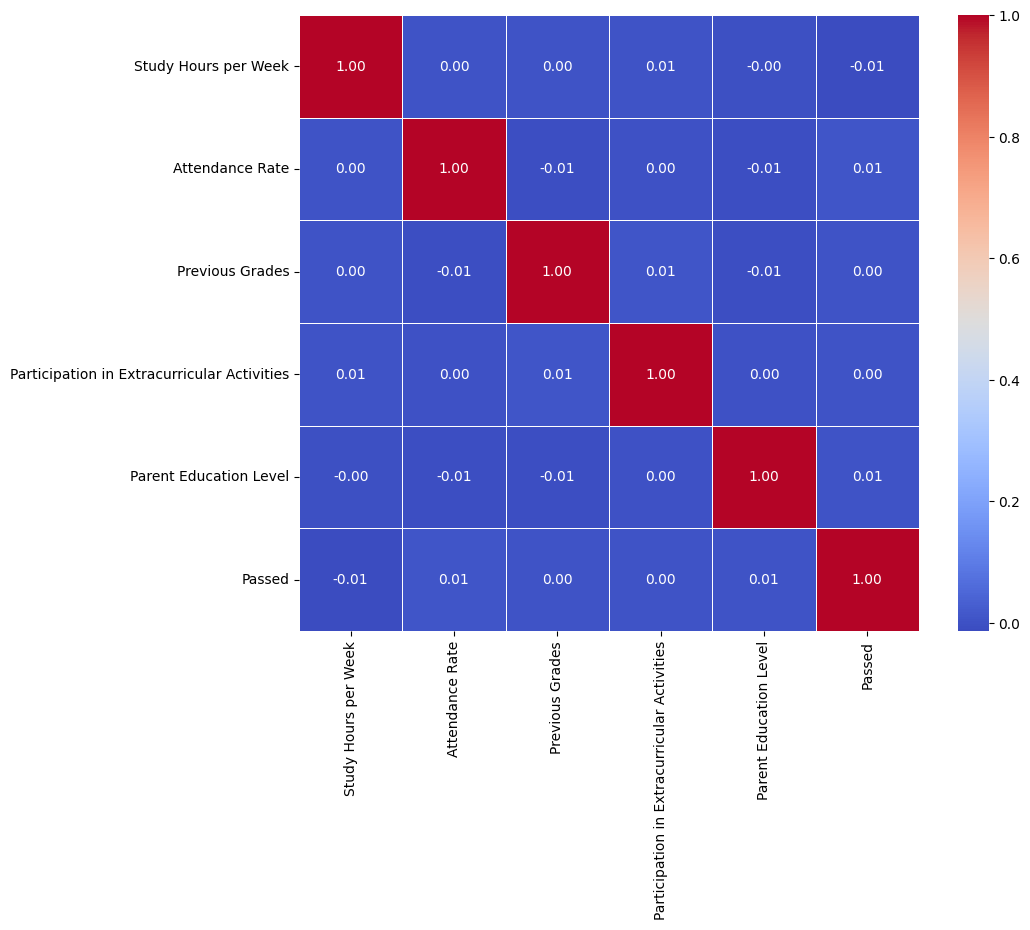

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns
num_cols = df_encoded.select(pl.col(pl.Float64), pl.col(pl.Int32))
corr_matrix = num_cols.corr()
col_name = corr_matrix.columns
print(col_name)
# Visualize the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5,
            xticklabels=col_name, yticklabels=col_name)
# plt.title('Correlation Matrix Heatmap')
# plt.show()

In [95]:
df_encoded = df_encoded.with_columns([
    (pl.col('Study Hours per Week') * pl.col('Attendance Rate')).alias('Learning Commitment')
]
)


In [96]:
# Standard Scaler 
mean_std = df_encoded.select([
    pl.col('Study Hours per Week').mean().alias('mean_study_hours'),
    pl.col('Study Hours per Week').std().alias('std_study_hours'),
    pl.col('Attendance Rate').mean().alias('mean_attendance_rate'),
    pl.col('Attendance Rate').std().alias('std_attendance_rate'),
    pl.col('Previous Grades').mean().alias('mean_previous_grades'),
    pl.col('Previous Grades').std().alias('std_previous_grades'),
    pl.col('Learning Commitment').mean().alias('mean_learning_commitment'),
    pl.col('Learning Commitment').std().alias('std_learning_commitment')
])
mean_std= mean_std.to_dict(as_series=False)
mean_std

{'mean_study_hours': [10.268752275962525],
 'std_study_hours': [4.700635293967899],
 'mean_attendance_rate': [75.31144436719967],
 'std_attendance_rate': [20.365181207903458],
 'mean_previous_grades': [65.39410401562552],
 'std_previous_grades': [16.46095917162193],
 'mean_learning_commitment': [773.6831721124242],
 'std_learning_commitment': [421.6245899025297]}

In [97]:
df_scaled = df_encoded.with_columns([
    ((pl.col('Study Hours per Week') - mean_std['mean_study_hours'][0])/mean_std['std_study_hours'][0]).alias('Study Hours Scaled'),
    ((pl.col('Attendance Rate') - mean_std['mean_attendance_rate'][0])/mean_std['std_attendance_rate'][0]).alias('Attendance Rate Scaled'),
    ((pl.col('Previous Grades') - mean_std['mean_previous_grades'][0])/mean_std['std_previous_grades'][0]).alias('Previous Grade Scaled'),
    ((pl.col('Learning Commitment') - mean_std['mean_learning_commitment'][0])/mean_std['std_learning_commitment'][0]).alias('Learning Commitment Scaled')   
])
df_scaled.head(5)

shape: (5, 12)
┌───────────┬───────────┬───────────┬───────────┬───┬───────────┬───────────┬───────────┬──────────┐
│ Student   ┆ Study     ┆ Attendanc ┆ Previous  ┆ … ┆ Study     ┆ Attendanc ┆ Previous  ┆ Learning │
│ ID        ┆ Hours per ┆ e Rate    ┆ Grades    ┆   ┆ Hours     ┆ e Rate    ┆ Grade     ┆ Commitme │
│ ---       ┆ Week      ┆ ---       ┆ ---       ┆   ┆ Scaled    ┆ Scaled    ┆ Scaled    ┆ nt       │
│ str       ┆ ---       ┆ f64       ┆ f64       ┆   ┆ ---       ┆ ---       ┆ ---       ┆ Scaled   │
│           ┆ f64       ┆           ┆           ┆   ┆ f64       ┆ f64       ┆ f64       ┆ ---      │
│           ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆ f64      │
╞═══════════╪═══════════╪═══════════╪═══════════╪═══╪═══════════╪═══════════╪═══════════╪══════════╡
│ S00002    ┆ 9.3       ┆ 95.3      ┆ 60.6      ┆ … ┆ -0.20609  ┆ 0.981506  ┆ -0.291241 ┆ 0.267078 │
│ S00004    ┆ 17.6      ┆ 76.8      ┆ 62.4      ┆ … ┆ 1.559629  ┆ 0.073093  ┆ -0.181891 ┆ 1.37088  │
│ S00005    ┆ 8.8       ┆ 89.3      ┆ 72.7      ┆ … ┆ -0.312458 ┆ 0.686886  ┆ 0.443832  ┆ 0.028833 │
│ S00006    ┆ 8.8       ┆ 73.8      ┆ 69.3      ┆ … ┆ -0.312458 ┆ -0.074217 ┆ 0.237282  ┆ -0.29467 │
│           ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆ 7        │
│ S00007    ┆ 17.9      ┆ 38.6      ┆ 93.6      ┆ … ┆ 1.62345   ┆ -1.802657 ┆ 1.713503  ┆ -0.19624 │
│           ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆ 8        │
└───────────┴───────────┴───────────┴───────────┴───┴───────────┴───────────┴───────────┴──────────┘

In [111]:
# X = df_scaled.with_columns([
#     pl.col('Study Hours Scaled'), pl.col('Attendance Rate Scaled'),
#     pl.col('Previous Grade Scaled'), pl.col('Learning Commitment Scaled')
# ])
X = df_scaled.select(pl.col('Study Hours Scaled'), pl.col('Attendance Rate Scaled'),
                    pl.col('Previous Grade Scaled'), pl.col('Learning Commitment Scaled'))
y = df_scaled.select(pl.col('Passed'))


In [112]:
# Prediction Models
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [117]:
# Logistic Regression Model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 0.50
Precision: 0.51
Recall: 0.42
F1 Score: 0.46
Confusion Matrix:
[[1700 1261]
 [1775 1306]]


/Users/moon/workspace/na/Polars/polars_env/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [118]:
# Random Forest Model
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print("Confusion Matrix:")
print(conf_matrix)


/Users/moon/workspace/na/Polars/polars_env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Accuracy: 0.49
Precision: 0.50
Recall: 0.47
F1 Score: 0.49
Confusion Matrix:
[[1535 1426]
 [1636 1445]]
